In [1]:
using GaussianRandomFields
using Plots

using JLD
using HDF5


┌ Warning: 1027 negative eigenvalues ≥ -4.2292054458468127e-13 detected, Gaussian
│             random field will be approximated (ignoring all negative eigenvalues)
└ @ GaussianRandomFields C:\Users\keke\.julia\packages\GaussianRandomFields\14l3C\src\generators\spectral.jl:75


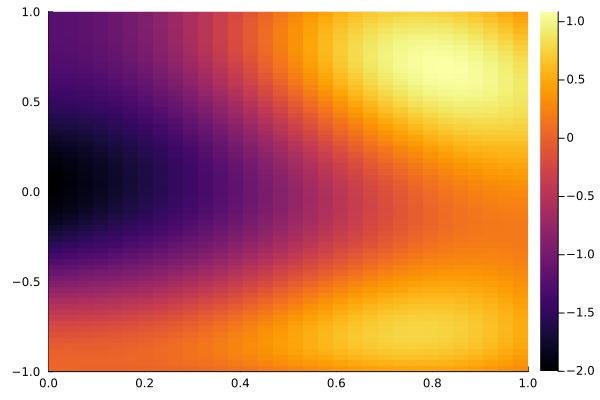

In [2]:
# 2d
lambda = 0.5*2^0.5
cov = CovarianceFunction(2, Gaussian(lambda))

nx, nv = 32, 64
dx, dv = 1.0 / nx, 2.0 / nv
pts_x = range(dx / 2.0, stop=1.0 - dx / 2.0, step=dx)
pts_v = range(-1.0 + dv / 2.0, stop=1.0 - dv / 2.0, step=dv)
# size(pts_x) # ((32,), (64,))

grf = GaussianRandomField(cov, Spectral(), pts_x, pts_v)
heatmap(grf)

In [3]:
# generate num_path=1024 f0
num_path = 1024
init_data = zeros(num_path, nx, nv)
grid_x, grid_v = zeros(nx, 1), zeros(1, nv)

for i in 1:nx
    grid_x[i] = pts_x[i]
end

for i in 1:nv
    grid_v[i] = pts_v[i]
end


R(v) = max(0, v)

B_xv = grid_x .* reshape(R.(grid_v), (1, :)) .+ (1.0 .- grid_x) .* reshape(R.(.-grid_v), (1, :)) # (32, 64)
C_xv = (1.0 .- 0.5 .* grid_x) # (32,)


for i in 1:num_path

    select_f0 = sample(grf)
    positive = minimum(select_f0 .* B_xv .+ C_xv)
    while positive < 0.5
        select_f0 = sample(grf)
        positive = minimum(select_f0 .* B_xv .+ C_xv)
    end
    init_data[i, :, :] = select_f0
end


In [ ]:
save("init_rte_data.jld", "f0", init_data, "grid_x", grid_x, "grid_v", grid_v)
